## <span style="color:blue">  Numerical exercises 5</span>

### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams.update({'font.size': 15})

- The steps of the metropolis uniform transiotion probability choosen in the simulations are 1.2 for the 100 state and 3.8 for the 210 state. The starting points are (1,1,0.9) and (1,2,2). 

- In the state 100 we have about a 50% acceptance, in the 210 about 41%. It will be fine make tuning of the metropolis step to make the acceptance ratio of the 210 state higher but the results are good enough also with this ratio

- In the plots you can see that the equilibration is reached quickly

- In my simulation i made 100 blocks of 10^4 steps

- Using a normal transition probability we can see that the last block value of the simulation and the expected value are very similar, we have a confidence level smaller than sigma !

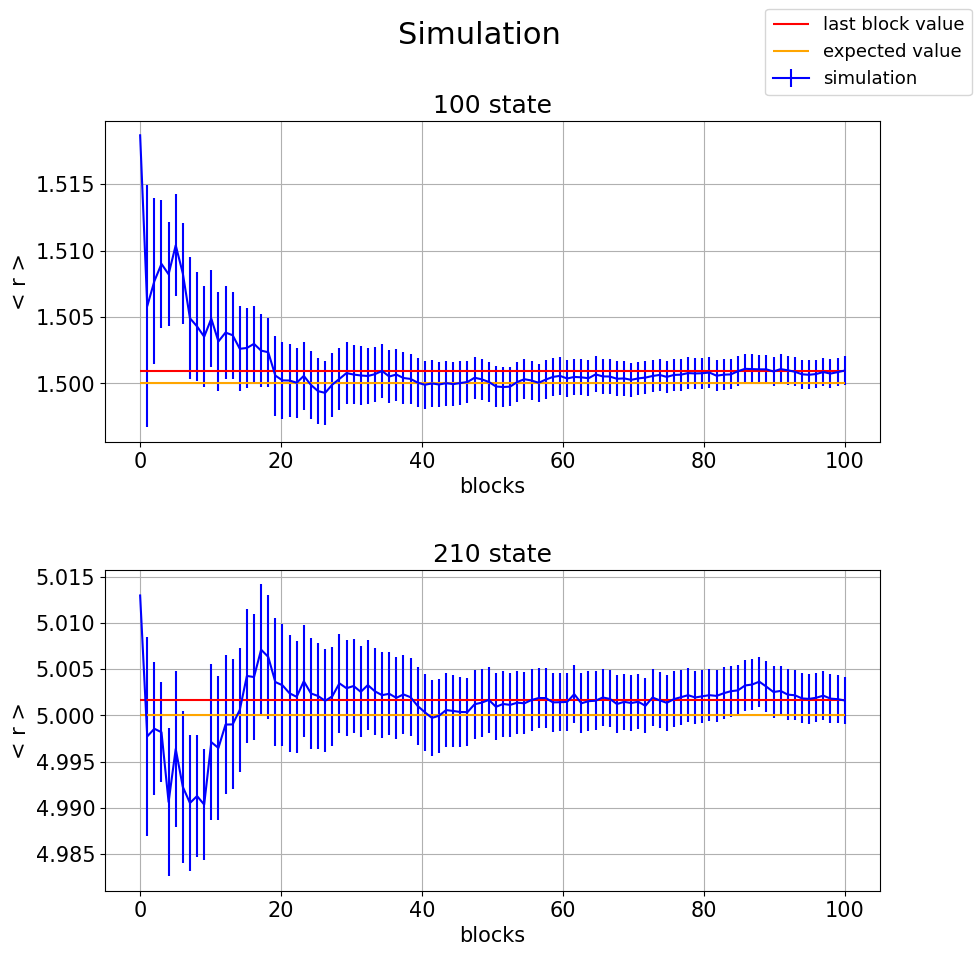

Per lo stato 100 partendo da (1,1,0.9) con step 1.2 si ottengono questi risultati
Per lo stato 210 partendo da (1,2,2) con step 3.8 si ottengono questi risultati


In [23]:
N = 100 #blocchi da 10k steps
x = np.linspace(0,N,N)
#fig, axs = plt.subplots(1,2, figsize = (10,10) )
fig = plt.figure(figsize =(10,10) )
fig.suptitle("Simulation", fontsize = (22))

r_0, error_0, r_0_ist = np.loadtxt("../c++/es 5/OUTPUT/uniform_prob/r.dat_0",usecols=(2,3,1), unpack = 'true')
r_1, error_1, r_1_ist   = np.loadtxt("../c++/es 5/OUTPUT/uniform_prob/r.dat_1",usecols=(2,3,1), unpack = 'true')

plt.subplot(2,1,1)
plt.errorbar(x,r_0,yerr=error_0, label = "simulation", color = "blue")
#plt.plot(r_0_ist, label = "position")
plt.title("100 state")
plt.xlabel("blocks")
plt.ylabel("< r >")
plt.hlines(r_0[-1] ,0 ,N, color = "red" , label = "last block value")
plt.hlines(1.5 ,0 ,N, color = "orange", label = "expected value") 
plt.grid(True)

plt.subplot(2,1,2)
plt.errorbar(x,r_1,yerr=error_1, color = "blue")
#plt.plot(r_1_ist, label = "position")
plt.title("210 state")
plt.xlabel("blocks")
plt.ylabel("< r >")
plt.hlines(5 ,0 ,N, color = "orange") 
plt.hlines(r_1[-1] ,0 ,N, color = "red") 
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
fig.legend( fontsize = 13)

plt.show()
print("Per lo stato 100 partendo da (1,1,0.9) con step 1.2 si ottengono questi risultati")
print("Per lo stato 210 partendo da (1,2,2) con step 3.8 si ottengono questi risultati")

In [329]:
plt.rcParams.update({'font.size': 15})

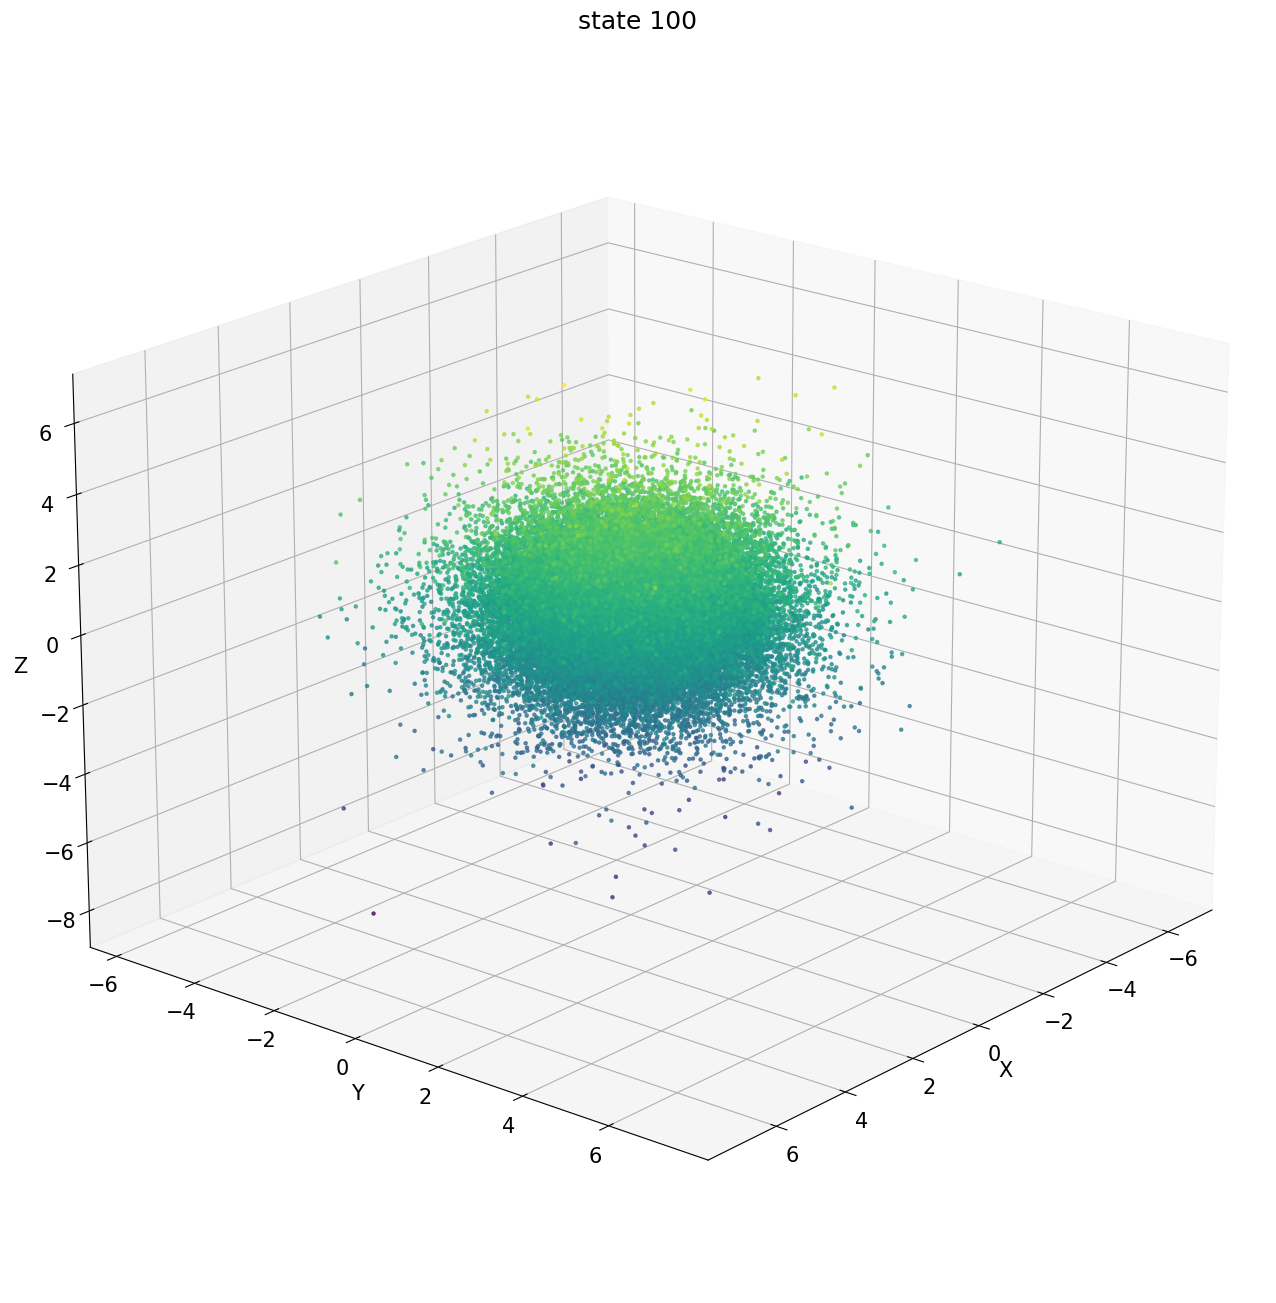

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
X,Y,Z = np.loadtxt("../c++/es 5/OUTPUT/uniform_prob/traj.dat_0",usecols=(0,1,2), unpack = 'true')


fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.', alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(20, 40)
ax.set_title("state 100")

# Imposta la posizione del grafico all'interno della figura
box = ax.get_position()
ax.set_position([box.x0 + 2, box.y0+2, box.width+1, box.height+0.8])


plt.show()

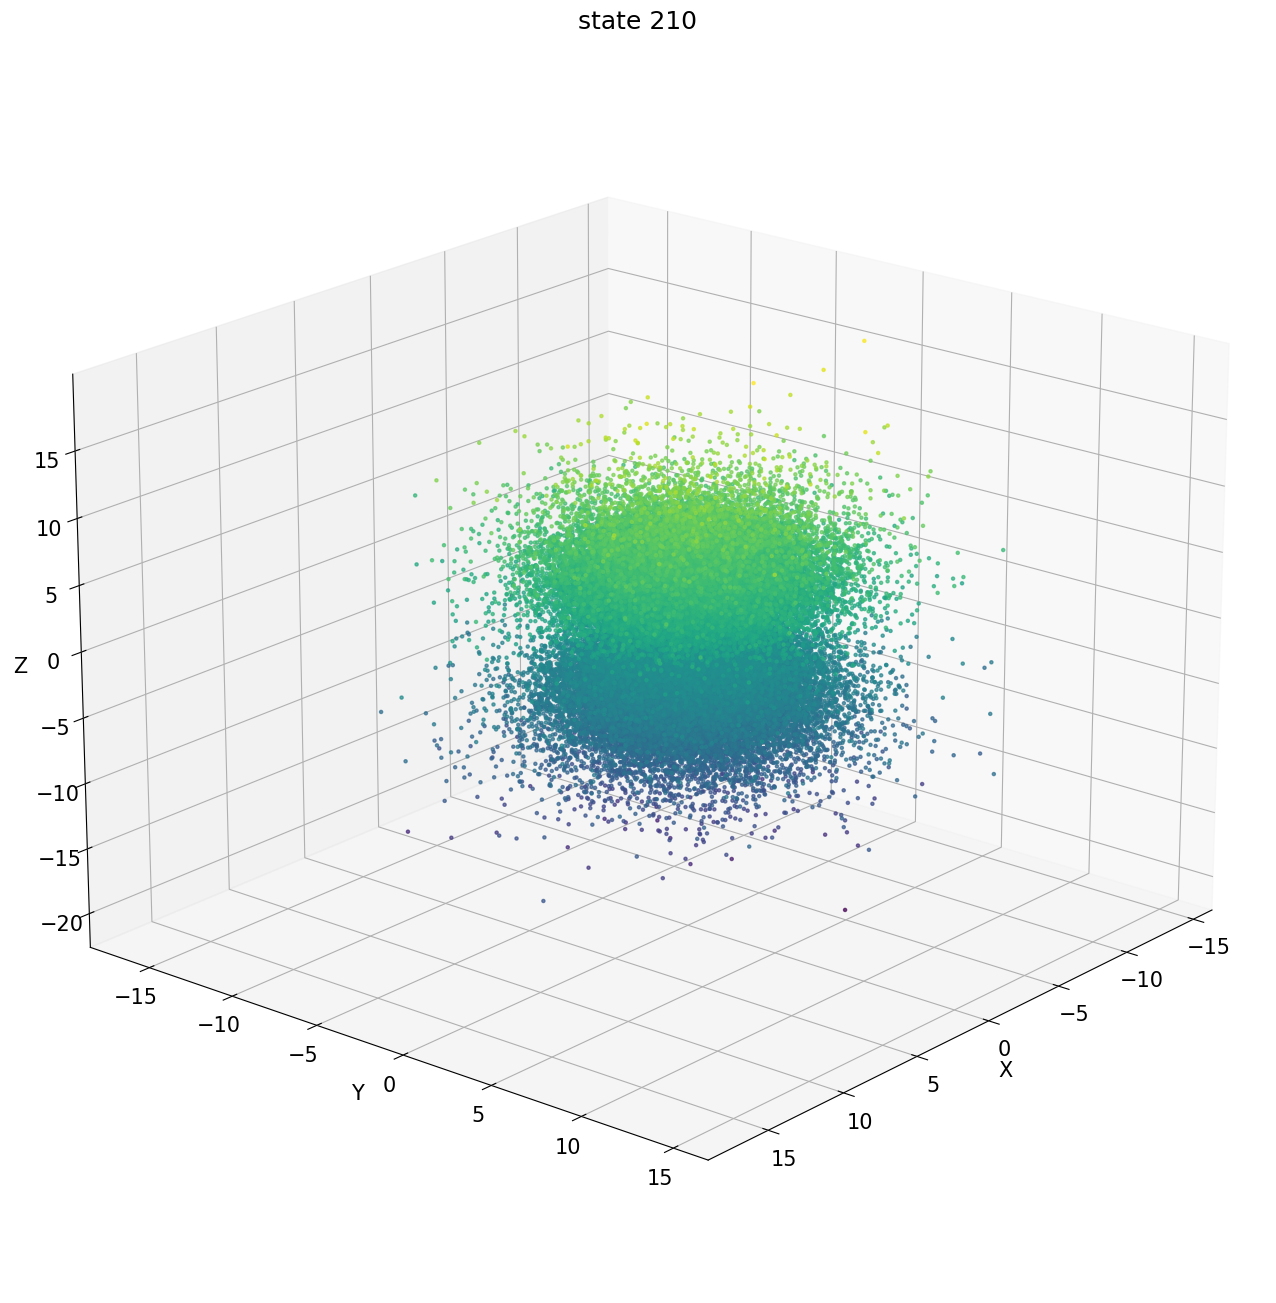

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
X,Y,Z = np.loadtxt("../c++/es 5/OUTPUT/uniform_prob/traj.dat_1",usecols=(0,1,2), unpack = 'true')


fig = plt.figure(figsize =(8,8) )
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.',alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(20, 40)
ax.set_title("state 210")

# Imposta la posizione del grafico all'interno della figura
box = ax.get_position()
ax.set_position([box.x0 + 2, box.y0+2, box.width+1, box.height+0.8])


plt.show()

### GAUSSIAN TRANSITION PROBABILITY

- In this case i use the same starting point and metropolis set using for the uniform transition probability
- the acceptance is 56% for the 100 state and 57% for the 210
- for the gaussian transition probability i used sigma(100) = 0.63 and sigma(210)=1.5

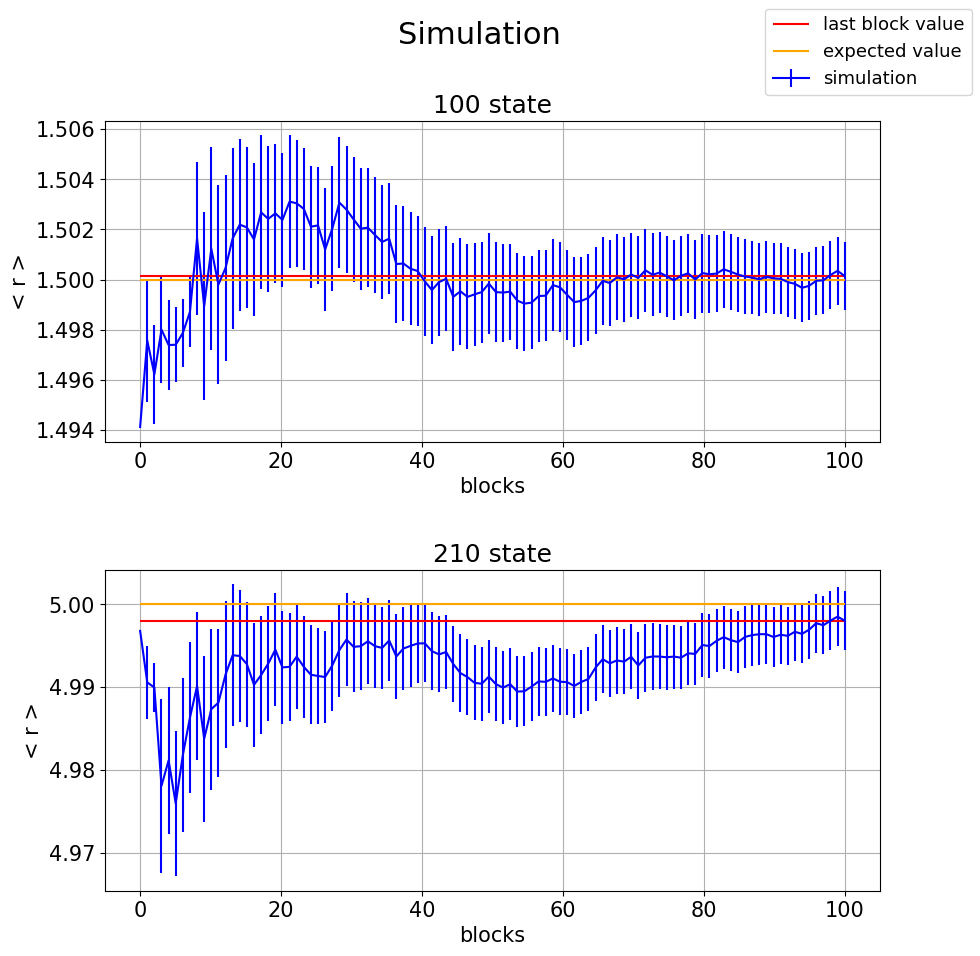

Per lo stato 100 partendo da (1,1,0.9) con sigma 0.63 si ottengono questi risultati
Per lo stato 210 partendo da (1,2,3) con sigma 1.75 si ottengono questi risultati


In [25]:
N = 100 #blocchi da 10k steps
x = np.linspace(0,N,N)
#fig, axs = plt.subplots(1,2, figsize = (10,10) )
fig = plt.figure(figsize =(10,10) )
fig.suptitle("Simulation", fontsize = (22))

r_0, error_0, r_0_ist = np.loadtxt("../c++/es 5/OUTPUT/gauss_prob/r.dat_0",usecols=(2,3,1), unpack = 'true')
r_1, error_1, r_1_ist   = np.loadtxt("../c++/es 5/OUTPUT/gauss_prob/r.dat_1",usecols=(2,3,1), unpack = 'true')

plt.subplot(2,1,1)
plt.errorbar(x,r_0,yerr=error_0, label = "simulation", color = "blue")
#plt.plot(r_0_ist, label = "position")
plt.title("100 state")
plt.xlabel("blocks")
plt.ylabel("< r >")
plt.hlines(r_0[-1] ,0 ,N, color = "red" , label = "last block value")
plt.hlines(1.5 ,0 ,N, color = "orange", label = "expected value") 
plt.grid(True)

plt.subplot(2,1,2)
plt.errorbar(x,r_1,yerr=error_1, color = "blue")
#plt.plot(r_1_ist, label = "position")
plt.title("210 state")
plt.xlabel("blocks")
plt.ylabel("< r >")
plt.hlines(5 ,0 ,N, color = "orange") 
plt.hlines(r_1[-1] ,0 ,N, color = "red") 
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
fig.legend( fontsize = 13)

plt.show()
print("Per lo stato 100 partendo da (1,1,0.9) con sigma 0.63 si ottengono questi risultati")
print("Per lo stato 210 partendo da (1,2,3) con sigma 1.75 si ottengono questi risultati")

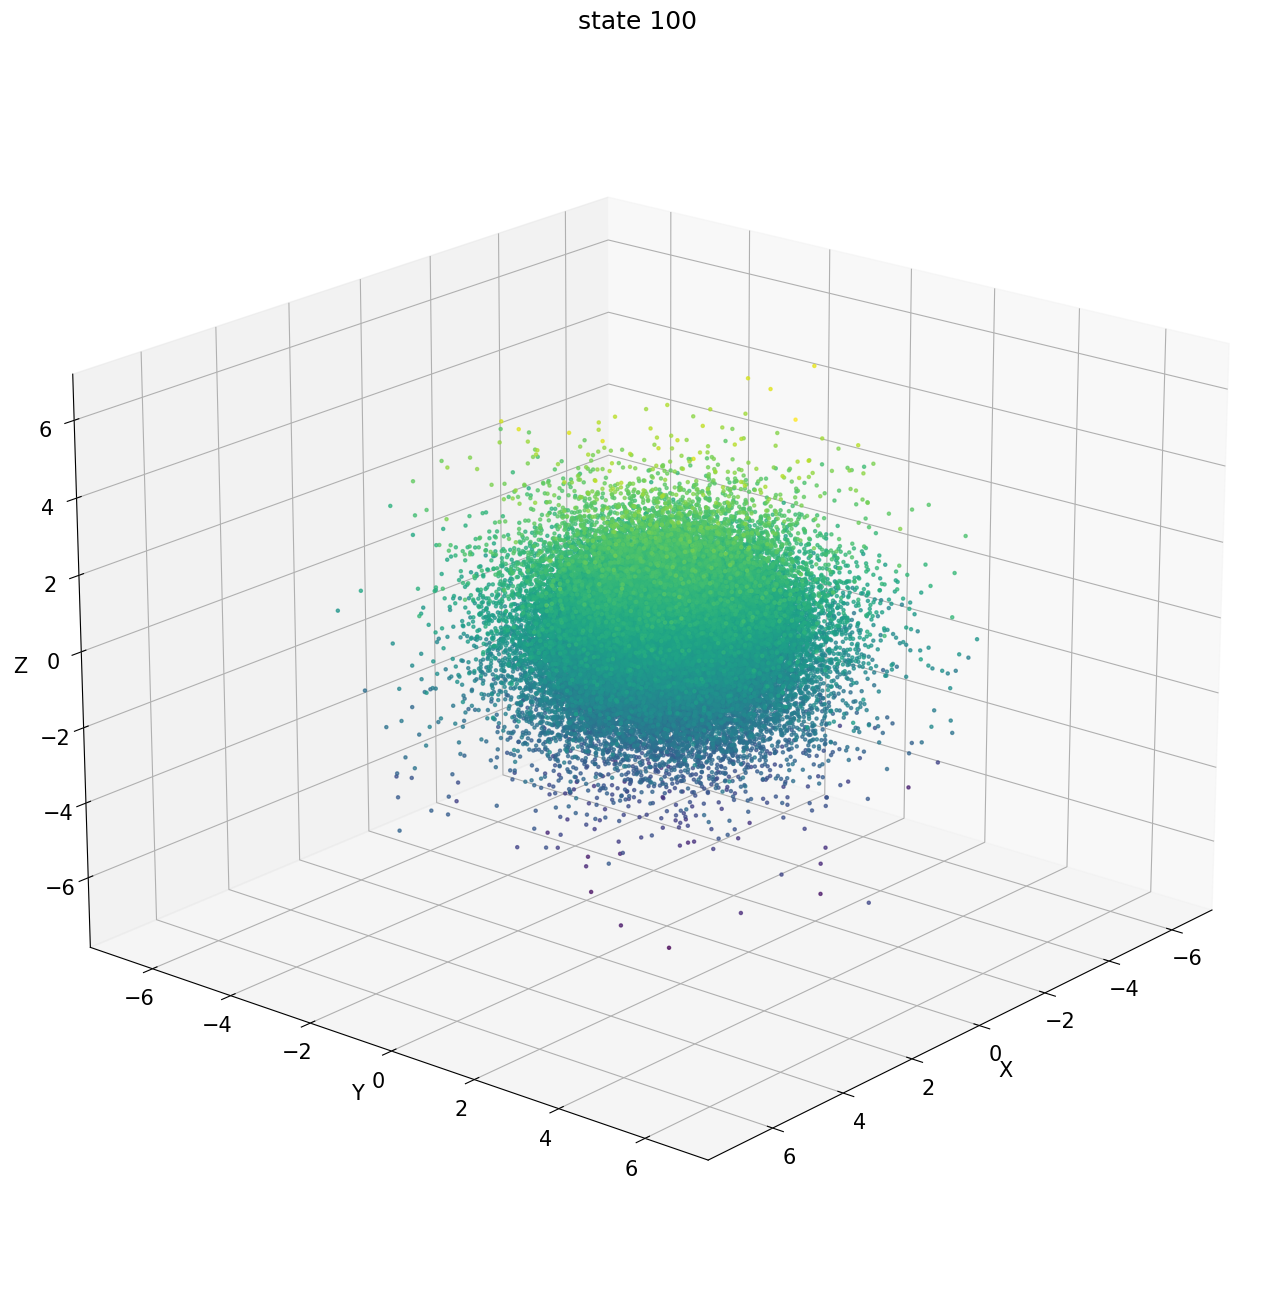

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
X,Y,Z = np.loadtxt("../c++/es 5/OUTPUT/gauss_prob/traj.dat_0",usecols=(0,1,2), unpack = 'true')


fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.', alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(20, 40)
ax.set_title("state 100")

# Imposta la posizione del grafico all'interno della figura
box = ax.get_position()
ax.set_position([box.x0 + 2, box.y0+2, box.width+1, box.height+0.8])


plt.show()

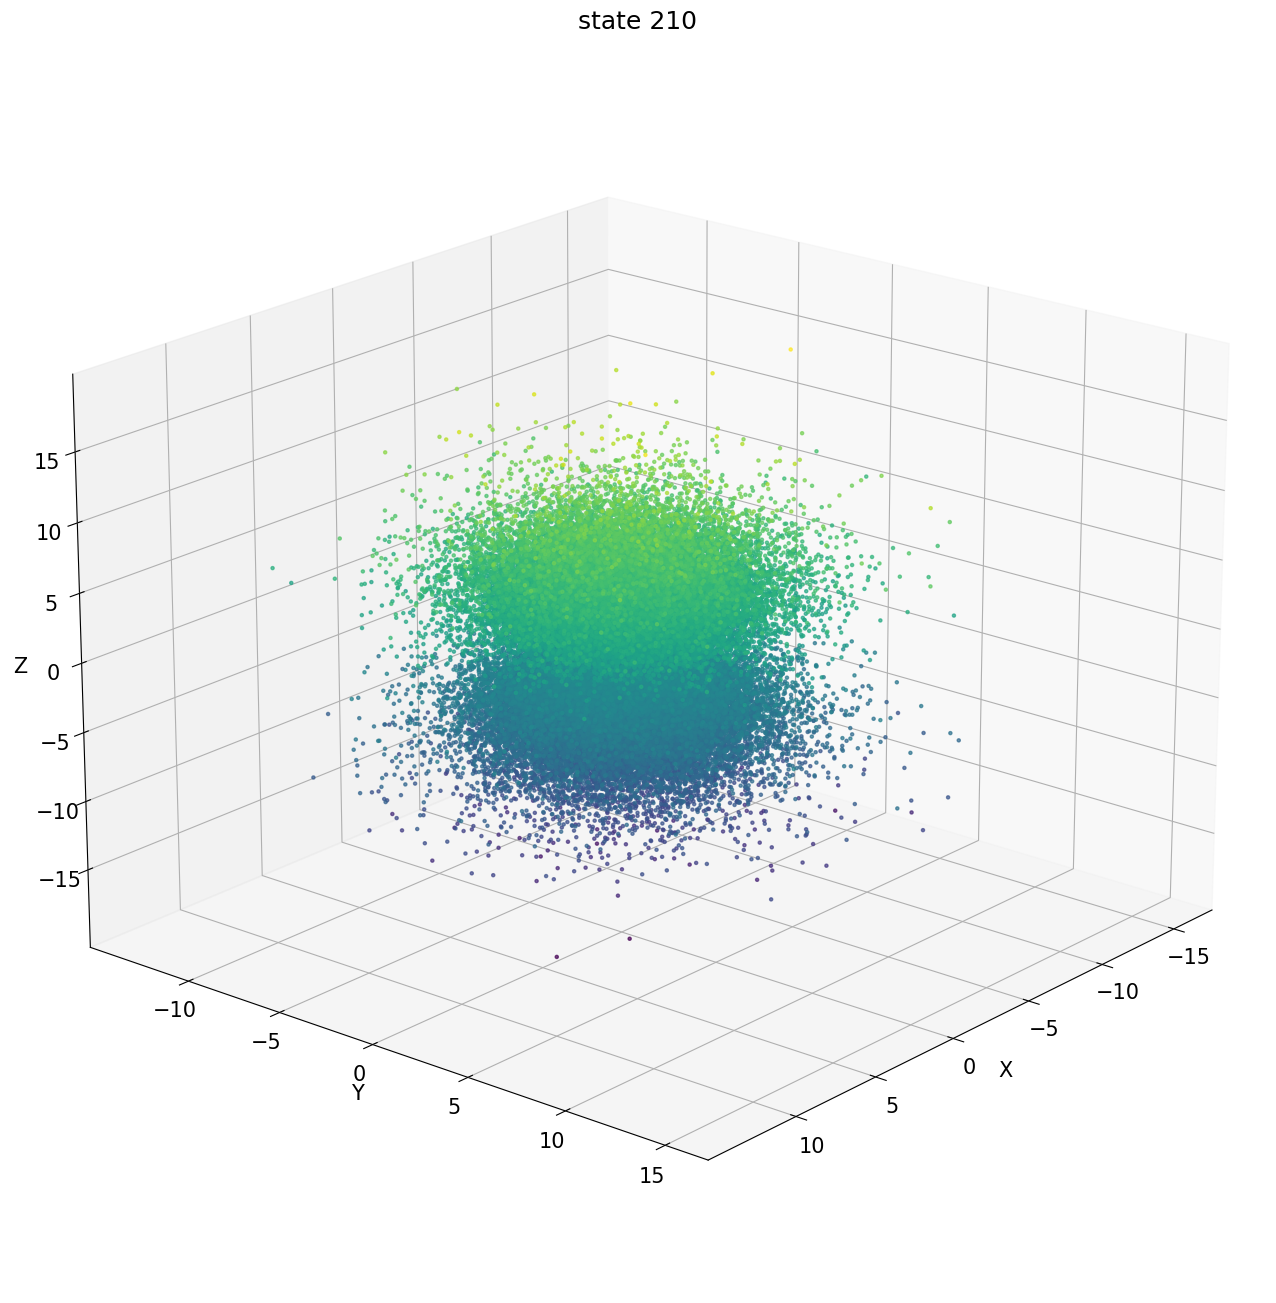

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
X,Y,Z = np.loadtxt("../c++/es 5/OUTPUT/gauss_prob/traj.dat_1",usecols=(0,1,2), unpack = 'true')


fig = plt.figure(figsize =(8,8) )
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.',alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(20, 40)
ax.set_title("state 210")

# Imposta la posizione del grafico all'interno della figura
box = ax.get_position()
ax.set_position([box.x0 + 2, box.y0+2, box.width+1, box.height+0.8])


plt.show()

- Results are very similar 